# Lab 2: Fourier series

This workbook explores the Fourier series representation of signals.  It is shown how symbolic methods can be used to calculate series coefficients, and the accuracy of the time-domain reconstruction for different numbers of coefficients is also considered.

## Background

Any signal $x(t)$ that is periodic with a period $T$ can be written in a Fourier series form
$$x(t) = \sum_{k=-\infty}^\infty c_k e^{j k \omega_0 t}$$
with $\omega_0 = 2\pi/T = \pi$ radians per second.  The coefficients satisfy
$$c_k = \frac{1}{T} \int_{-T/2}^{T/2} x(t) e^{-j k \omega_0 t} dt.$$

For real signals with $x(t) = x^\ast(t)$ one can show that $c_{-k} = c_k^{\ast}$.  Writing in polar form $c_{k} = |c_{k}| e^{j \angle c_{k}}$ the series can be represented trigonometrically as
$$
x(t) = c_0 + \sum_{k=1}^\infty ( c_k e^{j k \omega_0 t} + c_{-k} e^{-j k \omega_0 t} )
= c_0 + \sum_{k=1}^\infty |c_{k}| ( e^{j k \omega_0 t} e^{j \angle c_{k}} + e^{-j k \omega_0 t} e^{-j \angle c_{k}})
= c_0 + \sum_{k=1}^\infty 2 |c_{k}| \cos(\omega_0 t + \angle c_{k})
$$

The coefficient $c_k$ corresponds to a complex exponential with frequency $k \omega_0$.  We call the component of the signal with frequency $k \omega_0$ the $k$th *harmonic*.  The first harmonic is also called the *fundamental*.

## Signal definition and analysis

The following periodic signal, $x(t)$, is considered throughout this workbook:  

![](figures/rectpulsetrain.png)

The signal has period $T=8$ seconds, so $\omega_0 = 2 \pi/8 = \pi/4$ rad/second.  We can then find the corresponding Fourier series coefficients:
$$c_k = \frac{1}{T} \int_{-T/2}^{T/2} x(t) e^{-j k \omega_0 t} dt
= \frac{1}{T} \int_{-2}^{2} e^{-j k \omega_0 t} dt 
= \frac{1}{j k \omega_0 T} [-e^{-j k \omega_0 t}]_{t=-2}^{2}
= \frac{2}{k \omega_0 T} \sin(2 k \omega_0).
$$
Additionally, the DC coefficient $c_0 = 4/8 = 0.5$.

## Fourier series reconstruction

For a given set of coefficients $c_k$ we want to be able to plot the corresponding $x(t)$.  The function defined in the cell below takes a set of Fourier series coefficients (for a real signal) `ckv` and a fundamental frequency `omega0`, and then calculates reconstructed values `xv` at the time instants in `tv`.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def fsrrec(ckv,omega0,tv):
    """Generate samples from real Fourier series representation
    ckv - 0 to N Fourier series coefficients
    omega0 - fundamental frequency
    tv - input time points  
    returns xv - output signal points
    """
    
    # tv.shape returns the dimensions of the matrix (or, in this case, array) tv
    # np.ones creates an array of the input size populated with 1's
    xv = ckv[0]*np.ones(tv.shape); # Set all values to c0 initially
    for k in range(1,len(ckv)): # Apply the trigonometric Fourier series equation for k > 0
       
        xv = xv + 2*np.abs(ckv[k])*np.cos(k*omega0*tv + np.angle(ckv[k]));  # Update the kth harmonic components
        
    return(np.real(xv));
# end def

The function below does the same as above, but it also creates a plot of the individual harmonic components, i.e. one cosine function for every $k$.

In [14]:
def fsrrec_plots(ckv,omega0,tv):
    """The same as fssrec, but also outputs a plot of the individual harmonic components"""
    
    xv = ckv[0]*np.ones(tv.shape); 
    plt.figure(1)
    plt.plot(tv,np.real(xv), label="k = 0") # Plot the values of xv vs tv
    for k in range(1,len(ckv)):
        kh = 2*np.abs(ckv[k])*np.cos(k*omega0*tv + np.angle(ckv[k]));  # Create kth harmonic
        label_str = "k = " + str(k); # Label for the legend
        plt.plot(tv,kh, label=label_str);
        xv = xv + kh; # Add kth harmonic to x 
        
    plt.legend(loc="lower right")
    plt.show() # Show the plot
    return(np.real(xv));
# end def

The cell below uses the derived expression for the coefficients of the signal and stores them in the vector `ckv`.  The $k$th element of `ckv` contains the coefficient $c_k$.

In [15]:
# Fourier series coefficients for rectangular pulse train
T = 8;  # period
N = 10;  # maximum number of terms
omega0 = 2*np.pi/T;
ckv = np.zeros(N+1, dtype=np.complex64); # Type is complex (has real and imaginary parts), i.e. I + jQ
# np.zeros is like np.ones but with 0's

for k in range(1,N+1):
    ckv[k] = 2/(k*omega0*T)*np.sin(2*k*omega0); # Set all ck values for k > 0
ckv[0] = 4/8; # Set c0

We can use the `fsrrec` function to find the time-domain representation of the signal $x(t)$ using a finite number of terms in the reconstruction.  The code below does this and plots the result.

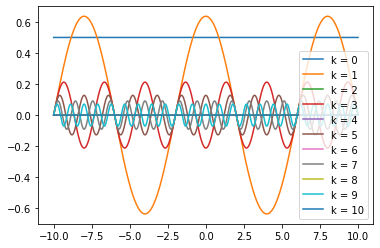

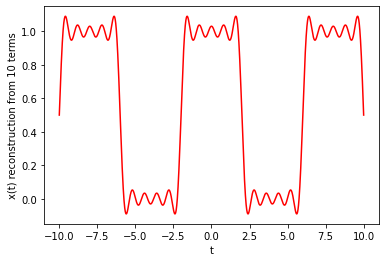

In [17]:
# Reconstruct from series representation and plot
tv = np.linspace(-10,10,10000); # Set t limits
xv = fsrrec(ckv,omega0,tv); # Create x(t) using fssrec function
fsrrec_plots(ckv,omega0,tv); # Plot individual harmonic components
plt.figure(2) # Create new figure
plt.plot(tv,xv,'r'); # Plot overall x(t) vs t for 10 terms (N)
plt.xlabel('t');  plt.ylabel('x(t) reconstruction from ' + str(N) + ' terms'); # Set axes labels

## Finding the coefficients using symbolic math

This section will show how we can calculate the Fourier series coefficients of a signal using symbolic manipulation.  The first thing to do is symbolically define the signal.  The `Piecewise` function lets you define a signal over different pieces.

/home/maneno/anaconda3/lib/python3.7/site-packages/sympy/plotting/plot.py:1065: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax[i].spines['left'].set_smart_bounds(True)
/home/maneno/anaconda3/lib/python3.7/site-packages/sympy/plotting/plot.py:1066: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax[i].spines['bottom'].set_smart_bounds(False)


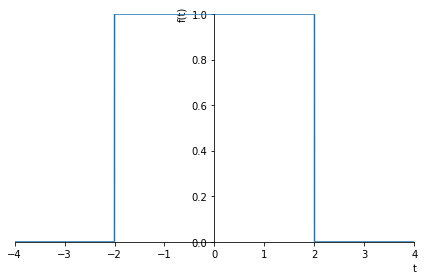

In [18]:
import sympy as sp
sp.init_printing();  # Pretty printing

t = sp.symbols('t')
x = sp.Piecewise( (0, t<-2), (1, t<2), (0, True));
sp.plot(x, (t,-4,4));  # Plot pulse function between t = -4 and t = 4
#sp.plot(x.subs(t,sp.re(t)), (t,-4,4));  # Use this to plot if the above doesn't work (forces t to be real)

#?sp.Piecewise() # Uncomment this if you want Help for the Piecewise function

The following cell defines the symbolic integral for computing the coefficients.

In [20]:
Ts, k, w0 = sp.symbols('Ts k w0');
w0 = 2*sp.pi/Ts;
expt = sp.exp(-1j*k*w0*t);
cke = 1/Ts*sp.integrate(x*expt, (t, -Ts/2, Ts/2)); # See ck formula above (in Background section)
#cke = sp.integrate(x*expt, (t, -sp.oo, T/2)) - sp.integrate(x*expt, (t, -sp.oo, -T/2));  # Alternative
ck = cke.subs(Ts,T).doit();  # Set value for period and evaluate

We now define a vector `kv` of coefficients of interest, and populate corresponding elements of `ckv` with the coefficient values.

In [7]:
kv = np.arange(-10,11);  # Coefficients to calculate, 21 points in total
# np.arange returns the integers between the given (start point) and (end point - 1), i.e. -10 to +10

ckvs = np.zeros(kv.shape, dtype=np.complex64);  # Corresponding coefficient values
for i in range(len(kv)):
    ckvs[i] = ck.subs({k:kv[i]}).evalf();
ckvs

array([ 0.        +0.j,  0.03536776+0.j, -0.        +0.j, -0.04547284+0.j,
        0.        +0.j,  0.06366198+0.j, -0.        +0.j, -0.10610329+0.j,
        0.        +0.j,  0.31830987+0.j,  0.5       +0.j,  0.31830987+0.j,
        0.        +0.j, -0.10610329+0.j, -0.        +0.j,  0.06366198+0.j,
        0.        +0.j, -0.04547284+0.j, -0.        +0.j,  0.03536776+0.j,
        0.        +0.j], dtype=complex64)

Now we can plot the frequency-domain representation of the signal $x(t)$ by displaying the value of $c_k$ for each value $k$ of interest.  Since $c_k$ can in general be complex we need two plots:  one for magnitude and one for phase.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


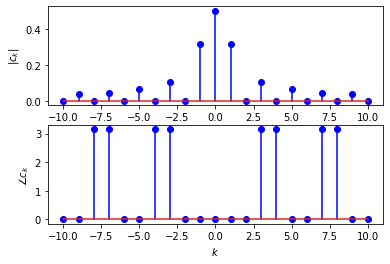

In [8]:
fh, ax = plt.subplots(2);
ax[0].stem(kv, np.abs(ckvs), 'b', markerfmt='bo');  ax[0].set_ylabel(r'$|c_k|$');
ax[1].stem(kv, np.angle(ckvs), 'b', markerfmt='bo');  ax[1].set_ylabel(r'$\angle c_k$');
plt.xlabel('$k$');

We could also have created a lambda function from the symbolic expression.  This function takes an array of values for $k$ and calculates $c_k$ directly.  NOTE: `lam_ck(0)` may generate a divide-by-zero error depending on your Python version.

In [9]:
lam_ck = sp.lambdify(k,ck,modules=['numpy']);
lam_ck(np.array((1,2,3)))

array([ 3.18309886e-01+0.j,  1.94908592e-17+0.j, -1.06103295e-01+0.j])

With numerical values for the coefficients, obtained via symbolic computation, we can plot the partial sum for the time-domain reconstruction as before.  Recall that our `fsrrec` function only takes the coefficients for non-negative index values.

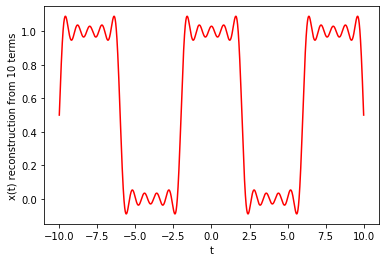

In [10]:
kzi = np.where(kv==0)[0][0];  # Index for zero element
ckvsp = ckvs[kzi:];
tv = np.linspace(-10,10,10000);
xv = fsrrec(ckvsp,2*np.pi/T,tv);

fh = plt.figure();
plt.plot(tv,xv,'r');
plt.xlabel('t');  plt.ylabel('x(t) reconstruction from ' + str(len(ckvsp)-1) + ' terms');

As expected, Figure 7 agrees with Figure 2. This shows how we could use symbolic maths to compute the $c_k$ integral equation, or evaluate the integral manually and then calculate $c_k$ in code for varying $k$ values.

# Tasks

These tasks involve writing code, or modifying existing code, to meet the objectives described.

1.  Find and plot the Fourier series frequency-domain representation for the signal $x_1(t)$ below. Show your code and your plots over the range $k=-8, \ldots, 8$. **Do this by evaluating the integral for the coefficients by hand - do not use symbolic processing.** Compare the result with that displayed earlier for $x(t)$ and comment on the changes (if any) in the magnitude and phase. Note that the signals are related in time by $x_1(t) = x(t-2)$. (5 marks)<br><br>
![](figures/rectpulsetrainshift.png)<br><br>







2.  Repeat Task 1 using symbolic processing. Be sure to show your code as well as the resulting plots. (5 marks)<br><br>

3.  Use symbolic processing to find and plot the frequency-domain representation of $x_2(t)$ below over the range $k=-8, \ldots, 8$. Also plot the reconstruction over the range $t=-4$ to $t=4$ using only components up to and including the $8$th harmonic. Comment on the magnitude of the coefficients and the accuracy of the reconstruction. (5 marks)<br><br>
![](figures/tripulsetrain.png)<br><br>


## Signal definition and analysis


The signal has period $T=2$ seconds, so $\omega_0 = 2 \pi/2 = \pi$ rad/second.  We can then find the corresponding Fourier series coefficients:
$$c_k = \frac{1}{T} \int_{-T/2}^{T/2} x(t) e^{-j k \omega_0 t} dt
= \frac{1}{T} \int_{-1}^{1} x(t) e^{-j k \omega_0 t} dt 
= \frac{1}{T} \int_{-1}^{0} (1+t) e^{-j k \omega_0 t} dt 
+ \frac{1}{T} \int_{0}^{1} (1-t) e^{-j k \omega_0 t} dt
= \frac{2}{T k^2 \omega_0^2} [1- \cos (k \omega_0)]
$$
Additionally, the DC coefficient $c_0 = 1/T =1/2= 0.5$.

/home/maneno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/maneno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


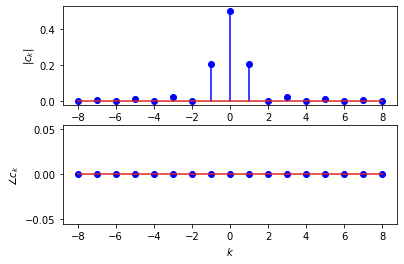

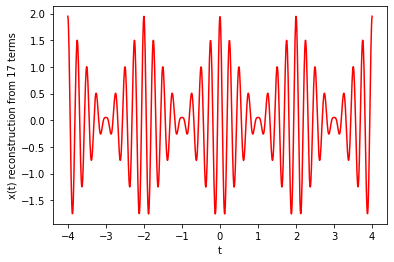

In [63]:
#QUESTION 3a frequency-domain representation of x2(t)


T = 2;  # period
N=17;  #Number of K
omega0 = 2*np.pi/T;
ckv = np.zeros(N, dtype=np.complex64); # Type is complex (has real and imaginary parts), i.e. I + jQ


for k in range(-8,9):
    if k==0:
        ckv[8] = 1/2; # Set c0
    
    else:
        ckv[k+8] = 2/((k**2)*(omega0**2)*T)*(1-np.cos(k*omega0)); # Set all ck values for k > 0
        

        
k = np.arange(-8,9);  # Coefficients to calculate, 17 points in total       
fh, ax = plt.subplots(2);
ax[0].stem(k, np.abs(ckv), 'b', markerfmt='bo');  ax[0].set_ylabel(r'$|c_k|$');
ax[1].stem(k, np.angle(ckv), 'b', markerfmt='bo');  ax[1].set_ylabel(r'$\angle c_k$');
plt.xlabel('$k$');

#QUESTION 3b reconstruction over the range t=−4 to t=4

# Reconstruct from series representation and plot
tv = np.linspace(-4,4,1000); # Set t limits
xv = fsrrec(ckv,omega0,tv); # Create x(t) using fssrec function
#fsrrec_plots(ckv,omega0,tv); # Plot individual harmonic components
plt.figure(2) # Create new figure
plt.plot(tv,xv,'r'); # Plot overall x(t) vs t for 10 terms (N)
plt.xlabel('t');  plt.ylabel('x(t) reconstruction from ' + str(N) + ' terms'); # Set axes labels



4.  Find and plot the Fourier series frequency-domain representation of $x_3(t)$ below. Show your code and your plots over the range $k=-8, \ldots, 8$. (5 marks)
![](figures/sawpulsetrain.png)<br><br>


## Signal definition and analysis


The signal has period $T=2$ seconds, so $\omega_0 = 2 \pi/2 = \pi$ rad/second.  We can then find the corresponding Fourier series coefficients:
$$c_k = \frac{1}{T} \int_{-T/2}^{T/2} x(t) e^{-j k \omega_0 t} dt
= \frac{1}{T} \int_{-1}^{1} x(t) e^{-j k \omega_0 t} dt 
= \frac{1}{T} \int_{-1}^{0} (0) e^{-j k \omega_0 t} dt 
+ \frac{1}{T} \int_{0}^{1} (t) e^{-j k \omega_0 t} dt
= \frac{-e^{-j k \omega_0}}{jT k \omega_0} 
+ \frac{e^{-j k \omega_0}}{T k^2 \omega_0^2} 
- \frac{1}{T k^2 \omega_0^2} 
$$
Additionally, the DC coefficient $c_0 = 1/T =1/2= 0.5$.

/home/maneno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/maneno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


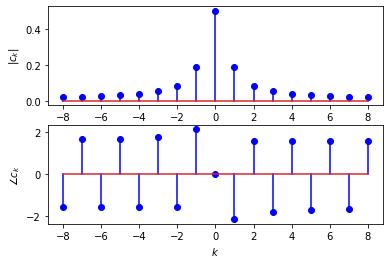

In [57]:
#QUESTION 4 frequency-domain representation of x2(t)

T = 2;  # period
N=17;  #Number of K
omega0 = 2*np.pi/T;
ckv = np.zeros(N, dtype=np.complex64); # Type is complex (has real and imaginary parts), i.e. I + jQ


for k in range(-8,9):
    if k==0:
        ckv[8] = 1/2; # Set c0
    
    else:
        ex=-1j*k*omega0;
        ckv[k+8] = (np.exp(ex))/((k**2)*(omega0**2)*T) - (np.exp(ex))/(k*omega0*T*1j)- 1/((k**2)*(omega0**2)*T) ; # Set all ck values for k > 0
        

        
k = np.arange(-8,9);  # Coefficients to calculate, 17 points in total       
fh, ax = plt.subplots(2);
ax[0].stem(k, np.abs(ckv), 'b', markerfmt='bo');  ax[0].set_ylabel(r'$|c_k|$');
ax[1].stem(k, np.angle(ckv), 'b', markerfmt='bo');  ax[1].set_ylabel(r'$\angle c_k$');
plt.xlabel('$k$');